In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob  # (kept since you import it elsewhere)

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB   # you use GaussianNB below
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# CV & pipelines
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score  # <<< ADDED
from sklearn.pipeline import Pipeline                                               # <<< ADDED
from sklearn.preprocessing import StandardScaler                                   # <<< ADDED

# metrics
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, balanced_accuracy_score
)

# scaling (kept for completeness)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import warnings
warnings.filterwarnings("ignore")


# NLP (kept only to mirror your original structure)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Models / ML utils
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, balanced_accuracy_score, make_scorer
)
from sklearn.base import clone

# Repro
RND = 42
np.random.seed(RND)

# ------------------
# NLTK resources
# ------------------
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')   # <<< CHANGED: this resource does not exist; remove to avoid errors
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, make_scorer
)
from sklearn.base import clone
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

from textblob import TextBlob

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Input, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K

np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving upload_DJIA_table.csv to upload_DJIA_table.csv


In [ ]:
df=pd.read_csv("Combined_News_DJIA.csv")
dj=pd.read_csv("upload_DJIA_table.csv")

In [ ]:
# Combine news headlines as one column
df["combined news"]=df.loc[:,"Top1":"Top25"].astype(str).agg(" ".join,axis=1)

In [ ]:
#cleaning the text column
# Convert text to lowercase and remove unwanted characters, links, and punctuation

stop = set(stopwords.words("english"))   #Load a list of common English stopwords
lemmatizer = WordNetLemmatizer()   #Load a lemmatizer, which reduces words to their root form

def clean_text(text):
    text = re.sub(r"b[\"']", " ", str(text).lower())
    text = re.sub(r"\[.*?\]\(.*?\)", "", text)
    text = re.sub(r"[^\w\s]", " ", text)  ## remove punctuation
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    tokens = word_tokenize(text)    # tokenize into words (Tokenize each headline into individual words)
    output = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop] # Lemmatize words to reduce them to their base form
    return " ".join(output)

# we apply a clean_text function to every row in the combined news
df["clean text"]=df["combined news"].apply(clean_text)

In [ ]:
#merge the news dataset and stock price dataset
df_merged=pd.merge(df,dj,on="Date",how="inner")

In [ ]:
# Download and install vaderSentiment library for sentiment analysis
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.6 MB/s eta 0:00:00


In [ ]:
# Import the VADER sentiment analyzer class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a sentiment analyzer object
analyse = SentimentIntensityAnalyzer()

# Compute the sentiment polarity scores for the 2nd entry in the "clean text" column
analyse.polarity_scores(df["clean text"][1])

{'neg': 0.284, 'neu': 0.613, 'pos': 0.103, 'compound': -0.9895}

In [ ]:
# define a function to apply VADER sentiment analysis to any given text
def get_sentiment(text):
    return analyse.polarity_scores(str(text))

In [ ]:
#  function to extract sentiment features from  VADER


def getSIA(text):
    sia = SentimentIntensityAnalyzer()      # Create a new SentimentIntensityAnalyzer object
    sentiment= sia.polarity_scores(text)    # Generate polarity sentiment scores
    return sentiment                        # Return the dictionary containing sentiment results

In [ ]:
# Extract VADER sentiment scores for each cleaned text(each day)
# We compute the four VADER metrics: compound, neg, pos, and neu

compound = []
neg = []
pos = []
neu = []

# Loop through all rows in the "clean text" column
for i in range(len(df["clean text"])):
    # Get the sentiment score dictionary for the current text
    SIA = get_sentiment(df["clean text"].iloc[i])

    # Append each score type to its respective list
    compound.append(SIA["compound"])
    neg.append(SIA["neg"])
    pos.append(SIA["pos"])
    neu.append(SIA["neu"])

# Add the sentiment scores back into the dataframe as separate columns
df["compound"] = compound
df["neg"] = neg
df["pos"] = pos
df["neu"] = neu


In [ ]:
# Assign the calculated sentiment values to the merged dataframe as new columns
df_merged["compound"] = compound   # overall normalized sentiment score
df_merged["neg"] = neg             # negative sentiment proportion
df_merged["pos"] = pos             # positive sentiment proportion
df_merged["neu"] = neu             # neutral sentiment proportion


In [ ]:
df_merged.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined news', 'clean text', 'compound', 'neg',
       'pos', 'neu', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'],
      dtype='object')

In [ ]:
df_merged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,compound,neg,pos,neu,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,-0.9971,0.287,0.067,0.646,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,-0.9895,0.284,0.103,0.613,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,-0.9942,0.259,0.091,0.650,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,-0.9712,0.199,0.104,0.697,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,-0.9855,0.249,0.131,0.620,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [ ]:
# Create a copy of df_merged
df = df_merged.copy()

# Convert the 'Date' column to datetime format, coercing invalid values to NaT
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Sort the dataframe by date and reset the index
df = df.sort_values("Date").reset_index(drop=True)


In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'combined news', 'clean text', 'compound', 'neg',
       'pos', 'neu', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'],
      dtype='object')

#Classification
**horizon = 1 Day**

In [ ]:
# ======================================
# parameters
# ======================================
RND          = 42
np.random.seed(RND)
SPLIT_DATE   = pd.Timestamp("2015-01-01")  # the boundary between training data (< 2015) and testing data (≥ 2015).
N_SPLITS     = 5                           # number of folds used in time-series cross-validation
HORIZON_DAYS = 1                           # prediction horizon (1-day ahead)
K_OPTIONS    = [8, 12, 16, 20, 30, 40]     # candidate values for k in k-NN or dimensionality settings in other models
THR_GRID     = np.linspace(0.2, 0.8, 61)   # a sequence of classification threshold values to search for optimal decision boundary


# ======================================
# Data preparation and validation
# ======================================
# Make sure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


# Define the essential columns required for analysis
need_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
             'compound','neg','pos','neu']



# Check whether all required columns are present in the dataset
# If any expected columns are missing, raise an error to prevent proceeding with incomplete data
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in price table: {missing}")


# Convert all numerical columns to numeric dtype to avoid processing errors
for c in need_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")


# Remove any rows with invalid or missing dates or value
df = df.dropna(subset=["Date","Adj Close"]).reset_index(drop=True)


# ----------------------------------------------
# Helper functions for generating technical indicators
# ----------------------------------------------

# Relative Strength Index (RSI), a momentum indicator
# it measures the speed and magnitude of price changes

def rsi(series, n=14):
    d = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / (dn + 1e-12)
    return 100 - 100/(1+rs)

# Moving Average Convergence Divergence
# it captures the relationship between fast and slow exponential moving averages
# to indicate trend direction and potential reversals.

def macd(series, fast=12, slow=26, signal=9):
    ema_f = series.ewm(span=fast, adjust=False).mean()
    ema_s = series.ewm(span=slow, adjust=False).mean()
    line = ema_f - ema_s
    sig  = line.ewm(span=signal, adjust=False).mean()
    return line, sig, line - sig

# roll_feats
# it Generates rolling statistical features over multiple window sizes,
# including moving averages, rolling standard deviations, exponential moving averages, price changes, z-scores, and quantiles
# These features enrich the model with meaningful historical price dynamics.

def roll_feats(s, wins=(3,5,10)):
    d = {"raw": s}
    for w in wins:
        d[f"mean{w}"] = s.rolling(w).mean()
        d[f"std{w}"]  = s.rolling(w).std()
        d[f"ema{w}"]  = s.ewm(span=w, adjust=False).mean()
        d[f"chg{w}"]  = s.diff(w)
    d["z20"] = (s - s.rolling(20).mean())/(s.rolling(20).std()+1e-12)
    d["q25"] = s.rolling(10).quantile(0.25)
    d["q75"] = s.rolling(10).quantile(0.75)
    return d



# -----------------------------
# Build same-day features (we will lag later)
# -----------------------------
px = pd.to_numeric(df["Adj Close"], errors="coerce")

# technicals
ret1  = px.pct_change()
ret5  = px.pct_change(5)
ret10 = px.pct_change(10)
vol10 = ret1.rolling(10).std()
vol20 = ret1.rolling(20).std()
rsi14 = rsi(px,14)
macd_line, macd_sig, macd_hist = macd(px)

# VADER blocks
comp = df["compound"]
pos  = df["pos"]
neg  = df["neg"]
neu  = df["neu"]

comp_d = roll_feats(comp)
pos_d  = roll_feats(pos)
neg_d  = roll_feats(neg)
neu_d  = roll_feats(neu)

dow   = df["Date"].dt.dayofweek.astype(float)
month = df["Date"].dt.month.astype(float)

F = pd.DataFrame({
    "Date": df["Date"],
    "Open":  df["Open"],
    "High":  df["High"],
    "Low":   df["Low"],
    "Close": df["Close"],
    "Adj_Close": px,
    "Volume": df["Volume"],
    "ret1":ret1, "ret5":ret5, "ret10":ret10,
    "vol10":vol10, "vol20":vol20,
    "rsi14": rsi14,
    "macd": macd_line, "macd_signal": macd_sig, "macd_hist": macd_hist,
    "dow": dow, "month": month
})

def add_block(prefix, dct):
    for k, v in dct.items():
        F[f"{prefix}_{k}"] = v

add_block("comp", comp_d)
add_block("pos", pos_d)
add_block("neg", neg_d)
add_block("neu", neu_d)

# sentiment x regime interactions
F["comp_x_ret1"]  = comp * ret1
F["comp_x_vol10"] = comp * vol10

# -----------------------------
# Target with horizon – CORRECT ALIGNMENT
# -----------------------------
# Features at Date t will use info up to t-1 (after lagging),
# so target at Date t must be the return from t-1 -> t-1+HORIZON_DAYS.
# General formula:
#   future_return_t = px.shift(-(HORIZON_DAYS - 1)) / px.shift(1) - 1
# For HORIZON_DAYS=1: px / px.shift(1) - 1  (next-day return)
future_return = px.shift(-(HORIZON_DAYS - 1)) / px.shift(1) - 1.0
y_target = (future_return > 0).astype(int)

# Put target with Date
target_df = pd.DataFrame({"Date": df["Date"], "y": y_target})

# -----------------------------
# Lag everything by 1 day (t-1 info only), EXCEPT target
# -----------------------------
lagged = F.copy()
for col in lagged.columns:
    if col != "Date":
        lagged[col] = lagged[col].shift(1)

# align features (lagged) and target by Date, then drop NaNs
lagged = lagged.merge(target_df, on="Date", how="left")
lagged = lagged.dropna().reset_index(drop=True)

# -----------------------------
# Train/Test split (no shuffle) + robust fallback
# -----------------------------
train = lagged[lagged["Date"] <  SPLIT_DATE].copy()
test  = lagged[lagged["Date"] >= SPLIT_DATE].copy()

if len(train) == 0 or len(test) == 0:
    dyn_split = lagged["Date"].iloc[int(len(lagged)*0.8)]
    print(f"[WARN] Using dynamic split at {dyn_split.date()} (80/20).")
    train = lagged[lagged["Date"] <  dyn_split].copy()
    test  = lagged[lagged["Date"] >= dyn_split].copy()

feature_cols = [c for c in lagged.columns if c not in ["Date","y"]]
X_train = train[feature_cols].to_numpy()
y_train = train["y"].astype(int).to_numpy()
X_test  = test[feature_cols].to_numpy()
y_test  = test["y"].astype(int).to_numpy()

print(f"Train n={len(y_train)}  Test n={len(y_test)}  |  "
      f"P(up)_train={y_train.mean():.3f}  P(up)_test={y_test.mean():.3f}  "
      f"| Horizon={HORIZON_DAYS}d")

# -----------------------------
# TimeSeriesSplit + scorer
# -----------------------------
N_SPLITS_EFF = min(N_SPLITS, max(2, len(y_train)-1))
if N_SPLITS_EFF < N_SPLITS:
    print(f"[INFO] Reducing CV folds from {N_SPLITS} to {N_SPLITS_EFF}.")
tscv = TimeSeriesSplit(n_splits=N_SPLITS_EFF)
cv_splits = list(tscv.split(X_train, y_train))
scorer_balacc = make_scorer(balanced_accuracy_score)

# -----------------------------
# Models & grids
# -----------------------------
def pipe_with_selector(est):
    return Pipeline([
        ("sc", StandardScaler()),
        ("sel", SelectKBest(score_func=mutual_info_classif, k=10)),
        ("clf", est)
    ])

pipe_lr  = Pipeline([("sc", StandardScaler()),
                     ("clf", LogisticRegression(max_iter=2000,
                                               class_weight="balanced",
                                               random_state=RND))])
pipe_lda = Pipeline([("sc", StandardScaler()),
                     ("clf", LinearDiscriminantAnalysis())])
rf = RandomForestClassifier(n_estimators=600,
                            random_state=RND,
                            n_jobs=-1)

pipe_svm = pipe_with_selector(SVC(probability=True,
                                  class_weight="balanced",
                                  random_state=RND))
pipe_knn = pipe_with_selector(KNeighborsClassifier())
nb = GaussianNB()

param_grids = {
    "KNN": {
        "est": pipe_knn,
        "grid": {
            "sel__k": K_OPTIONS,
            "clf__n_neighbors":[3,5,7,9,11,15,21],
            "clf__weights":["uniform","distance"],
            "clf__p":[1,2]
        }},
    "SVM": {
        "est": pipe_svm,
        "grid": [
            {"sel__k": K_OPTIONS,
             "clf__kernel":["linear"],
             "clf__C":[0.25,0.5,1,2,5]},
            {"sel__k": K_OPTIONS,
             "clf__kernel":["rbf"],
             "clf__C":[0.5,1,2,5,10],
             "clf__gamma":["scale","auto",0.1,0.05,0.02]}
        ]},
    "NaiveBayes": {
        "est": nb,
        "grid": {"var_smoothing":[1e-9,1e-8,1e-7,1e-6,1e-5]}
    },
}
fixed_models = {
    "LogisticRegression": pipe_lr,
    "LDA": pipe_lda,
    "RandomForest": rf
}

# -----------------------------
# Utilities: decision scores + threshold search
# -----------------------------
def decision_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:,1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s_min, s_max = np.min(s), np.max(s)
        if s_max - s_min < 1e-12:
            return np.full_like(s, 0.5, dtype=float)
        return (s - s_min) / (s_max - s_min)
    yhat = model.predict(X).astype(float)
    return (yhat - yhat.min()) / (yhat.max() - yhat.min() + 1e-12)

def cv_find_threshold(clf, X, y, cv_splits, grid=THR_GRID):
    ts = []
    for tr, va in cv_splits:
        m = clone(clf).fit(X[tr], y[tr])
        s = decision_scores(m, X[va])
        if np.allclose(s, s[0]):
            ts.append(0.5); continue
        best_t, best_sc = 0.5, -1
        for t in grid:
            yhat = (s >= t).astype(int)
            sc = balanced_accuracy_score(y[va], yhat)
            if sc > best_sc:
                best_sc, best_t = sc, t
        ts.append(best_t)
    return float(np.mean(ts))

# -----------------------------
# Tune base models + thresholds
# -----------------------------
cv_rows, best_models, best_thresholds, cv_balacc = [], {}, {}, {}
from statistics import mean

print("\n=== Tuning (Balanced Accuracy; shared time folds) ===")
for name, cfg in param_grids.items():
    gs = GridSearchCV(cfg["est"], cfg["grid"],
                      scoring=scorer_balacc,
                      cv=cv_splits,
                      n_jobs=-1,
                      refit=True)
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_
    thr = cv_find_threshold(gs.best_estimator_, X_train, y_train, cv_splits)
    best_thresholds[name] = thr
    cv_balacc[name] = float(gs.best_score_)
    cv_rows.append({
        "Model":name,
        "BestParams":gs.best_params_,
        "CV_BalAcc":round(gs.best_score_,4),
        "CV_Thr":round(thr,3)
    })
    print(f"{name}: CV BalAcc={gs.best_score_:.4f} | thr={thr:.3f} | {gs.best_params_}")

for name, mdl in fixed_models.items():
    scores = []
    for tr, va in cv_splits:
        m = clone(mdl).fit(X_train[tr], y_train[tr])
        yhat = m.predict(X_train[va])
        scores.append(balanced_accuracy_score(y_train[va], yhat))
    thr = cv_find_threshold(clone(mdl), X_train, y_train, cv_splits)
    best_models[name] = clone(mdl).fit(X_train, y_train)
    best_thresholds[name] = thr
    cv_balacc[name] = float(mean(scores))
    cv_rows.append({
        "Model":name,
        "BestParams":"(none)",
        "CV_BalAcc":round(mean(scores),4),
        "CV_Thr":round(thr,3)
    })
    print(f"{name}: CV BalAcc={mean(scores):.4f} | thr={thr:.3f}")

cv_summary = pd.DataFrame(cv_rows).sort_values("CV_BalAcc", ascending=False)
print("\n=== CV summary (train only) ===")
print(cv_summary)

# -----------------------------
# Final held-out test per base model
# -----------------------------
perfs = []
for name, mdl in best_models.items():
    mdl.fit(X_train, y_train)
    s = decision_scores(mdl, X_test)
    thr = best_thresholds[name]
    tstar = 0.5 if not np.isfinite(thr) else thr
    y_pred = (s >= tstar).astype(int)

    perfs.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred),4),
        "BalancedAcc": round(balanced_accuracy_score(y_test, y_pred),4),
        "Precision_w": round(precision_score(y_test, y_pred,
                                             average="weighted",
                                             zero_division=0),4),
        "Recall_w": round(recall_score(y_test, y_pred,
                                       average="weighted",
                                       zero_division=0),4),
        "F1_w": round(f1_score(y_test, y_pred,
                               average="weighted",
                               zero_division=0),4),
        "Threshold": round(tstar,3)
    })

    print(f"\n{name} — TEST (thr={tstar:.3f})")
    print(classification_report(y_test, y_pred,
                                digits=3, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

base_results = pd.DataFrame(perfs).sort_values("BalancedAcc", ascending=False)
print("\n=== Base model Test results (held-out) ===")
print(base_results)


Train n=1590  Test n=378  |  P(up)_train=0.542  P(up)_test=0.508  | Horizon=1d

=== Tuning (Balanced Accuracy; shared time folds) ===
KNN: CV BalAcc=0.5338 | thr=0.544 | {'clf__n_neighbors': 11, 'clf__p': 2, 'clf__weights': 'distance', 'sel__k': 8}
SVM: CV BalAcc=0.5345 | thr=0.542 | {'clf__C': 2, 'clf__gamma': 0.1, 'clf__kernel': 'rbf', 'sel__k': 8}
NaiveBayes: CV BalAcc=0.5216 | thr=0.542 | {'var_smoothing': 1e-09}
LogisticRegression: CV BalAcc=0.5068 | thr=0.424
LDA: CV BalAcc=0.5125 | thr=0.374
RandomForest: CV BalAcc=0.5147 | thr=0.468

=== CV summary (train only) ===
                Model                                         BestParams  \
1                 SVM  {'clf__C': 2, 'clf__gamma': 0.1, 'clf__kernel'...   
0                 KNN  {'clf__n_neighbors': 11, 'clf__p': 2, 'clf__we...   
2          NaiveBayes                           {'var_smoothing': 1e-09}   
5        RandomForest                                             (none)   
4                 LDA                   

**horizon = 5 day**

In [ ]:
# ======================================
# parameters
# ======================================
RND          = 42
np.random.seed(RND)
SPLIT_DATE   = pd.Timestamp("2015-01-01")  # the boundary between training data (< 2015) and testing data (≥ 2015).
N_SPLITS     = 5                           # number of folds used in time-series cross-validation
HORIZON_DAYS = 5                           # prediction horizon (5-day ahead)
K_OPTIONS    = [8, 12, 16, 20, 30, 40]     # candidate values for k in k-NN or dimensionality settings in other models
THR_GRID     = np.linspace(0.2, 0.8, 61)   # a sequence of classification threshold values to search for optimal decision boundary


# ======================================
# Data preparation and validation
# ======================================
# Make sure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


# Define the essential columns required for analysis
need_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
             'compound','neg','pos','neu']



# Check whether all required columns are present in the dataset
# If any expected columns are missing, raise an error to prevent proceeding with incomplete data
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in price table: {missing}")


# Convert all numerical columns to numeric dtype to avoid processing errors
for c in need_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")


# Remove any rows with invalid or missing dates or value
df = df.dropna(subset=["Date","Adj Close"]).reset_index(drop=True)


# ----------------------------------------------
# Helper functions for generating technical indicators
# ----------------------------------------------

# Relative Strength Index (RSI), a momentum indicator
# it measures the speed and magnitude of price changes

def rsi(series, n=14):
    d = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / (dn + 1e-12)
    return 100 - 100/(1+rs)

# Moving Average Convergence Divergence
# it captures the relationship between fast and slow exponential moving averages
# to indicate trend direction and potential reversals.

def macd(series, fast=12, slow=26, signal=9):
    ema_f = series.ewm(span=fast, adjust=False).mean()
    ema_s = series.ewm(span=slow, adjust=False).mean()
    line = ema_f - ema_s
    sig  = line.ewm(span=signal, adjust=False).mean()
    return line, sig, line - sig

# roll_feats
# it Generates rolling statistical features over multiple window sizes,
# including moving averages, rolling standard deviations, exponential moving averages, price changes, z-scores, and quantiles
# These features enrich the model with meaningful historical price dynamics.

def roll_feats(s, wins=(3,5,10)):
    d = {"raw": s}
    for w in wins:
        d[f"mean{w}"] = s.rolling(w).mean()
        d[f"std{w}"]  = s.rolling(w).std()
        d[f"ema{w}"]  = s.ewm(span=w, adjust=False).mean()
        d[f"chg{w}"]  = s.diff(w)
    d["z20"] = (s - s.rolling(20).mean())/(s.rolling(20).std()+1e-12)
    d["q25"] = s.rolling(10).quantile(0.25)
    d["q75"] = s.rolling(10).quantile(0.75)
    return d



# -----------------------------
# Build same-day features (we will lag later)
# -----------------------------
px = pd.to_numeric(df["Adj Close"], errors="coerce")

# technicals
ret1  = px.pct_change()
ret5  = px.pct_change(5)
ret10 = px.pct_change(10)
vol10 = ret1.rolling(10).std()
vol20 = ret1.rolling(20).std()
rsi14 = rsi(px,14)
macd_line, macd_sig, macd_hist = macd(px)

# VADER blocks
comp = df["compound"]
pos  = df["pos"]
neg  = df["neg"]
neu  = df["neu"]

comp_d = roll_feats(comp)
pos_d  = roll_feats(pos)
neg_d  = roll_feats(neg)
neu_d  = roll_feats(neu)

dow   = df["Date"].dt.dayofweek.astype(float)
month = df["Date"].dt.month.astype(float)

F = pd.DataFrame({
    "Date": df["Date"],
    "Open":  df["Open"],
    "High":  df["High"],
    "Low":   df["Low"],
    "Close": df["Close"],
    "Adj_Close": px,
    "Volume": df["Volume"],
    "ret1":ret1, "ret5":ret5, "ret10":ret10,
    "vol10":vol10, "vol20":vol20,
    "rsi14": rsi14,
    "macd": macd_line, "macd_signal": macd_sig, "macd_hist": macd_hist,
    "dow": dow, "month": month
})

def add_block(prefix, dct):
    for k, v in dct.items():
        F[f"{prefix}_{k}"] = v

add_block("comp", comp_d)
add_block("pos", pos_d)
add_block("neg", neg_d)
add_block("neu", neu_d)

# sentiment x regime interactions
F["comp_x_ret1"]  = comp * ret1
F["comp_x_vol10"] = comp * vol10

# -----------------------------
# Target with horizon – CORRECT ALIGNMENT
# -----------------------------
# Features at Date t will use info up to t-1 (after lagging),
# so target at Date t must be the return from t-1 -> t-1+HORIZON_DAYS.
# General formula:
#   future_return_t = px.shift(-(HORIZON_DAYS - 1)) / px.shift(1) - 1
# For HORIZON_DAYS=1: px / px.shift(1) - 1  (next-day return)
future_return = px.shift(-(HORIZON_DAYS - 1)) / px.shift(1) - 1.0
y_target = (future_return > 0).astype(int)

# Put target with Date
target_df = pd.DataFrame({"Date": df["Date"], "y": y_target})

# -----------------------------
# Lag everything by 1 day (t-1 info only), EXCEPT target
# -----------------------------
lagged = F.copy()
for col in lagged.columns:
    if col != "Date":
        lagged[col] = lagged[col].shift(1)

# align features (lagged) and target by Date, then drop NaNs
lagged = lagged.merge(target_df, on="Date", how="left")
lagged = lagged.dropna().reset_index(drop=True)

# -----------------------------
# Train/Test split (no shuffle) + robust fallback
# -----------------------------
train = lagged[lagged["Date"] <  SPLIT_DATE].copy()
test  = lagged[lagged["Date"] >= SPLIT_DATE].copy()

if len(train) == 0 or len(test) == 0:
    dyn_split = lagged["Date"].iloc[int(len(lagged)*0.8)]
    print(f"[WARN] Using dynamic split at {dyn_split.date()} (80/20).")
    train = lagged[lagged["Date"] <  dyn_split].copy()
    test  = lagged[lagged["Date"] >= dyn_split].copy()

feature_cols = [c for c in lagged.columns if c not in ["Date","y"]]
X_train = train[feature_cols].to_numpy()
y_train = train["y"].astype(int).to_numpy()
X_test  = test[feature_cols].to_numpy()
y_test  = test["y"].astype(int).to_numpy()

print(f"Train n={len(y_train)}  Test n={len(y_test)}  |  "
      f"P(up)_train={y_train.mean():.3f}  P(up)_test={y_test.mean():.3f}  "
      f"| Horizon={HORIZON_DAYS}d")

# -----------------------------
# TimeSeriesSplit + scorer
# -----------------------------
N_SPLITS_EFF = min(N_SPLITS, max(2, len(y_train)-1))
if N_SPLITS_EFF < N_SPLITS:
    print(f"[INFO] Reducing CV folds from {N_SPLITS} to {N_SPLITS_EFF}.")
tscv = TimeSeriesSplit(n_splits=N_SPLITS_EFF)
cv_splits = list(tscv.split(X_train, y_train))
scorer_balacc = make_scorer(balanced_accuracy_score)

# -----------------------------
# Models & grids
# -----------------------------
def pipe_with_selector(est):
    return Pipeline([
        ("sc", StandardScaler()),
        ("sel", SelectKBest(score_func=mutual_info_classif, k=10)),
        ("clf", est)
    ])

pipe_lr  = Pipeline([("sc", StandardScaler()),
                     ("clf", LogisticRegression(max_iter=2000,
                                               class_weight="balanced",
                                               random_state=RND))])
pipe_lda = Pipeline([("sc", StandardScaler()),
                     ("clf", LinearDiscriminantAnalysis())])
rf = RandomForestClassifier(n_estimators=600,
                            random_state=RND,
                            n_jobs=-1)

pipe_svm = pipe_with_selector(SVC(probability=True,
                                  class_weight="balanced",
                                  random_state=RND))
pipe_knn = pipe_with_selector(KNeighborsClassifier())
nb = GaussianNB()

param_grids = {
    "KNN": {
        "est": pipe_knn,
        "grid": {
            "sel__k": K_OPTIONS,
            "clf__n_neighbors":[3,5,7,9,11,15,21],
            "clf__weights":["uniform","distance"],
            "clf__p":[1,2]
        }},
    "SVM": {
        "est": pipe_svm,
        "grid": [
            {"sel__k": K_OPTIONS,
             "clf__kernel":["linear"],
             "clf__C":[0.25,0.5,1,2,5]},
            {"sel__k": K_OPTIONS,
             "clf__kernel":["rbf"],
             "clf__C":[0.5,1,2,5,10],
             "clf__gamma":["scale","auto",0.1,0.05,0.02]}
        ]},
    "NaiveBayes": {
        "est": nb,
        "grid": {"var_smoothing":[1e-9,1e-8,1e-7,1e-6,1e-5]}
    },
}
fixed_models = {
    "LogisticRegression": pipe_lr,
    "LDA": pipe_lda,
    "RandomForest": rf
}

# -----------------------------
# Utilities: decision scores + threshold search
# -----------------------------
def decision_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:,1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s_min, s_max = np.min(s), np.max(s)
        if s_max - s_min < 1e-12:
            return np.full_like(s, 0.5, dtype=float)
        return (s - s_min) / (s_max - s_min)
    yhat = model.predict(X).astype(float)
    return (yhat - yhat.min()) / (yhat.max() - yhat.min() + 1e-12)

def cv_find_threshold(clf, X, y, cv_splits, grid=THR_GRID):
    ts = []
    for tr, va in cv_splits:
        m = clone(clf).fit(X[tr], y[tr])
        s = decision_scores(m, X[va])
        if np.allclose(s, s[0]):
            ts.append(0.5); continue
        best_t, best_sc = 0.5, -1
        for t in grid:
            yhat = (s >= t).astype(int)
            sc = balanced_accuracy_score(y[va], yhat)
            if sc > best_sc:
                best_sc, best_t = sc, t
        ts.append(best_t)
    return float(np.mean(ts))

# -----------------------------
# Tune base models + thresholds
# -----------------------------
cv_rows, best_models, best_thresholds, cv_balacc = [], {}, {}, {}
from statistics import mean

print("\n=== Tuning (Balanced Accuracy; shared time folds) ===")
for name, cfg in param_grids.items():
    gs = GridSearchCV(cfg["est"], cfg["grid"],
                      scoring=scorer_balacc,
                      cv=cv_splits,
                      n_jobs=-1,
                      refit=True)
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_
    thr = cv_find_threshold(gs.best_estimator_, X_train, y_train, cv_splits)
    best_thresholds[name] = thr
    cv_balacc[name] = float(gs.best_score_)
    cv_rows.append({
        "Model":name,
        "BestParams":gs.best_params_,
        "CV_BalAcc":round(gs.best_score_,4),
        "CV_Thr":round(thr,3)
    })
    print(f"{name}: CV BalAcc={gs.best_score_:.4f} | thr={thr:.3f} | {gs.best_params_}")

for name, mdl in fixed_models.items():
    scores = []
    for tr, va in cv_splits:
        m = clone(mdl).fit(X_train[tr], y_train[tr])
        yhat = m.predict(X_train[va])
        scores.append(balanced_accuracy_score(y_train[va], yhat))
    thr = cv_find_threshold(clone(mdl), X_train, y_train, cv_splits)
    best_models[name] = clone(mdl).fit(X_train, y_train)
    best_thresholds[name] = thr
    cv_balacc[name] = float(mean(scores))
    cv_rows.append({
        "Model":name,
        "BestParams":"(none)",
        "CV_BalAcc":round(mean(scores),4),
        "CV_Thr":round(thr,3)
    })
    print(f"{name}: CV BalAcc={mean(scores):.4f} | thr={thr:.3f}")

cv_summary = pd.DataFrame(cv_rows).sort_values("CV_BalAcc", ascending=False)
print("\n=== CV summary (train only) ===")
print(cv_summary)

# -----------------------------
# Final held-out test per base model
# -----------------------------
perfs = []
for name, mdl in best_models.items():
    mdl.fit(X_train, y_train)
    s = decision_scores(mdl, X_test)
    thr = best_thresholds[name]
    tstar = 0.5 if not np.isfinite(thr) else thr
    y_pred = (s >= tstar).astype(int)

    perfs.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred),4),
        "BalancedAcc": round(balanced_accuracy_score(y_test, y_pred),4),
        "Precision_w": round(precision_score(y_test, y_pred,
                                             average="weighted",
                                             zero_division=0),4),
        "Recall_w": round(recall_score(y_test, y_pred,
                                       average="weighted",
                                       zero_division=0),4),
        "F1_w": round(f1_score(y_test, y_pred,
                               average="weighted",
                               zero_division=0),4),
        "Threshold": round(tstar,3)
    })

    print(f"\n{name} — TEST (thr={tstar:.3f})")
    print(classification_report(y_test, y_pred,
                                digits=3, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

base_results = pd.DataFrame(perfs).sort_values("BalancedAcc", ascending=False)
print("\n=== Base model Test results (held-out) ===")
print(base_results)


Train n=1590  Test n=378  |  P(up)_train=0.586  P(up)_test=0.532  | Horizon=5d

=== Tuning (Balanced Accuracy; shared time folds) ===
KNN: CV BalAcc=0.5378 | thr=0.364 | {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform', 'sel__k': 8}
SVM: CV BalAcc=0.5478 | thr=0.522 | {'clf__C': 0.25, 'clf__kernel': 'linear', 'sel__k': 20}
NaiveBayes: CV BalAcc=0.5236 | thr=0.544 | {'var_smoothing': 1e-09}
LogisticRegression: CV BalAcc=0.5262 | thr=0.430
LDA: CV BalAcc=0.5365 | thr=0.484
RandomForest: CV BalAcc=0.5035 | thr=0.430

=== CV summary (train only) ===
                Model                                         BestParams  \
1                 SVM  {'clf__C': 0.25, 'clf__kernel': 'linear', 'sel...   
0                 KNN  {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__wei...   
4                 LDA                                             (none)   
3  LogisticRegression                                             (none)   
2          NaiveBayes                           {'var_

# **PART 2: REGRESSION TASK**
Using LSTM to predict the actual Adjusted Close price
Based on past stock data + sentiment features

In [ ]:

# Load and merge data
# we have stock market data and the news headlines data
# Ensure the Date column is in a datetime format so that both dataframes can be merged correctly
# then we Merge the news data with the stock data using the shared Date column

df_news = pd.read_csv("Combined_News_DJIA.csv")
df_stock = pd.read_csv("upload_DJIA_table.csv")
df_news['Date'] = pd.to_datetime(df_news['Date'])
df_stock['Date'] = pd.to_datetime(df_stock['Date'])
df = pd.merge(df_news, df_stock, on="Date", how="inner")

In [ ]:
# we define clean_text function
# we clean and preprocess the text data


stop = set(stopwords.words("english"))   #Load a list of common English stopwords
lemmatizer = WordNetLemmatizer()   #Load a lemmatizer, which reduces words to their root form

def clean_text(text):
    text = re.sub(r"b[\"']", " ", str(text).lower())
    text = re.sub(r"\[.*?\]\(.*?\)", "", text)
    text = re.sub(r"[^\w\s]", " ", text)  ## remove punctuation
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    tokens = word_tokenize(text)    # tokenize into words
    output = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop]
    return " ".join(output)

# Clean each headline column individually
# This goes through all 25 headline columns (Top1 to Top25) and cleans each headline using the clean_text function
headline_cols = [f'Top{i}' for i in range(1, 26)]
for col in headline_cols:
    df[col] = df[col].astype(str).apply(clean_text)


In [ ]:
# we perform VADER sentiment analysis on all 25 cleaned news headlines (Top1 to Top25) and then computing the average sentiment score for each day

sid = SentimentIntensityAnalyzer()  #we load the VADER model for sentiment scoring


#Apply VADER to each of the 25 columns (headlines)
for col in headline_cols:
    scores = df[col].astype(str).apply(sid.polarity_scores)
    for v in ['compound', 'pos', 'neg', 'neu']:  #Extracts the 4 VADER scores for each headline
        df[f"{col}_{v}"] = scores.apply(lambda x: x[v])


#Calculate the average sentiment scores across all 25 headlines for each day
for v in ['compound', 'pos', 'neg', 'neu']:
    df[f"mean_{v}"] = df[[f"{col}_{v}" for col in headline_cols]].mean(axis=1)


In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top24_neg,Top24_neu,Top25_compound,Top25_pos,Top25_neg,Top25_neu,mean_compound,mean_pos,mean_neg,mean_neu
0,2008-08-08,0,georgia down two russian warplane country move...,breaking musharraf impeached,russia today column troop roll south ossetia f...,russian tank moving towards capital south osse...,afghan child raped impunity u n official say s...,russian tank entered south ossetia whilst geor...,breaking georgia invades south ossetia russia ...,enemy combatent trial nothing sham salim haman...,...,0.746,0.254,0.4019,0.474,0.000,0.526,-0.356156,0.06772,0.26456,0.66772
1,2008-08-11,1,wont america nato help u wont help u help iraq,bush put foot georgian conflict,jewish georgian minister thanks israeli traini...,georgian army flees disarray russian advance g...,olympic opening ceremony firework faked,mossad fraudulent new zealand passport iraq,russia angered israeli military sale georgia,american citizen living ossetia blame u georgi...,...,0.443,0.227,0.0000,0.000,0.000,1.000,-0.216880,0.07952,0.27404,0.64640
2,2008-08-12,0,remember adorable year old sang opening ceremo...,russia end georgia operation,sexual harassment would child,al qa eda losing support iraq brutal crackdown...,ceasefire georgia putin outmaneuvers west,microsoft intel tried kill xo laptop,stratfor russo georgian war balance power,trying get sense whole georgia russia war vote...,...,0.000,1.000,0.0000,0.000,0.000,1.000,-0.252652,0.08596,0.23308,0.68092
3,2008-08-13,0,u refuse israel weapon attack iran report,president ordered attack tskhinvali capital so...,israel clear troop killed reuters cameraman,britain policy tough drug pointless say former...,body year old found trunk latest ransom paid k...,china moved million quake survivor prefab home,bush announces operation get russia grill yeah...,russian force sink georgian ship,...,0.237,0.763,-0.3400,0.000,0.255,0.745,-0.117928,0.09384,0.18520,0.72088
4,2008-08-14,1,expert admit legalise drug,war south osetia picture made russian soldier,swedish wrestler ara abrahamian throw away med...,russia exaggerated death toll south ossetia or...,missile killed inside pakistan may launched cia,rushdie condemns random house refusal publish ...,poland u agree missle defense deal interesting...,russian conquer tblisi bet seriously bet,...,0.619,0.381,0.7096,0.457,0.000,0.543,-0.164324,0.12552,0.23036,0.64416


In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8',
       ...
       'Top24_neg', 'Top24_neu', 'Top25_compound', 'Top25_pos', 'Top25_neg',
       'Top25_neu', 'mean_compound', 'mean_pos', 'mean_neg', 'mean_neu'],
      dtype='object', length=137)

In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8',
       ...
       'Top24_neg', 'Top24_neu', 'Top25_compound', 'Top25_pos', 'Top25_neg',
       'Top25_neu', 'mean_compound', 'mean_pos', 'mean_neg', 'mean_neu'],
      dtype='object', length=137)

In [ ]:
# ==== imports (if not already) ====
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42); np.random.seed(42)

# ==== ensure datetime & numeric ====
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
for c in ['mean_compound', 'mean_pos', 'mean_neg', 'mean_neu', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Adj Close']:
    df[c] = pd.to_numeric(df[c], errors="coerce")

In [ ]:

# ==== technical indicators ====
px = df["Adj Close"]

In [ ]:
# returns
df["ret1"]  = px.pct_change(1)
df["ret5"]  = px.pct_change(5)
df["ret10"] = px.pct_change(10)


In [ ]:

# volatility (std of daily returns)
df["vol10"] = df["ret1"].rolling(10).std()
df["vol20"] = df["ret1"].rolling(20).std()


In [ ]:

# RSI(14)
def rsi(series, n=14):
    d  = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / dn.replace(0, 1e-12)
    return 100 - (100 / (1 + rs))
df["RSI14"] = rsi(px, 14)


In [ ]:

# MACD(12,26,9)
ema12 = px.ewm(span=12, adjust=False).mean()
ema26 = px.ewm(span=26, adjust=False).mean()
df["MACD"]     = ema12 - ema26
df["MACDsig"]  = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACDhist"] = df["MACD"] - df["MACDsig"]

In [ ]:

# day of week
df["dow"] = df["Date"].dt.dayofweek.astype(float)

In [ ]:


# ==== features (your base + indicators) ====
base_features = ['mean_compound', 'mean_pos', 'mean_neg', 'mean_neu','Open', 'High', 'Low', 'Close', 'Volume']
tech_features = [
    "ret1","ret5","ret10",
    "vol10","vol20",
    "RSI14","MACD","MACDsig","MACDhist",
    "dow"
]
features = base_features + tech_features


In [ ]:
target = 'Adj Close'   # or AdjClose_next if you want next-day prediction

df_merged = df.dropna(subset=features + [target]).reset_index(drop=True)

In [ ]:

# ============================================
# ✅ TIME-BASED TRAIN / TEST SPLIT
# ============================================
train = df_merged[df_merged['Date'] < '2015-01-01']
test  = df_merged[df_merged['Date'] >= '2015-01-01']

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(train[features])
y_train = y_scaler.fit_transform(train[[target]])

X_test  = X_scaler.transform(test[features])
y_test  = y_scaler.transform(test[[target]])

In [ ]:
SEQ_LEN = 30

def create_sequences(X, y, seq_len=SEQ_LEN):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)
X_test_seq, y_test_seq = create_sequences(X_test,  y_test)


In [ ]:

# Fix randomness
tf.random.set_seed(42)
np.random.seed(42)

# ============================================
# ✅ LSTM MODEL (your architecture unchanged)
# ============================================
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, X_train_seq.shape[2])),
    Dropout(0.1),
    LSTM(64, return_sequences=True),
    Dropout(0.1),
    LSTM(32),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1
)

# ============================================
# ✅ PREDICTION (inverse scaling)
# ============================================
y_pred_scaled = model.predict(X_test_seq)
y_pred_inv = y_scaler.inverse_transform(y_pred_scaled)
y_test_inv = y_scaler.inverse_transform(y_test_seq)

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0519 - val_loss: 0.0063
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0025 - val_loss: 9.6930e-04
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0019 - val_loss: 8.0881e-04
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0020 - val_loss: 7.6508e-04
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0018 - val_loss: 7.2227e-04
Epoch 10/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 11/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0019 - val_loss: 5.9148e-04
Epoch 12/200
44/44 ━━━━━━━━━━━━

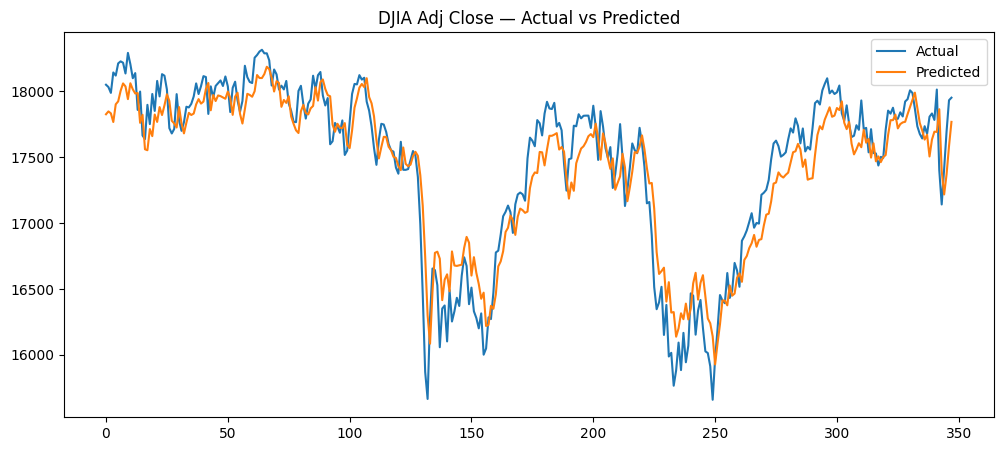

MSE: 50216.9570
RMSE: 224.0914
MAE: 179.1697
R² Score: 0.8807
MAPE: 1.04%


In [ ]:
# ============================================
# ✅ PLOT — Actual vs Predicted
# ============================================
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('DJIA Adj Close — Actual vs Predicted')
plt.show()
# ============================================
# ✅ METRICS
# ============================================
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


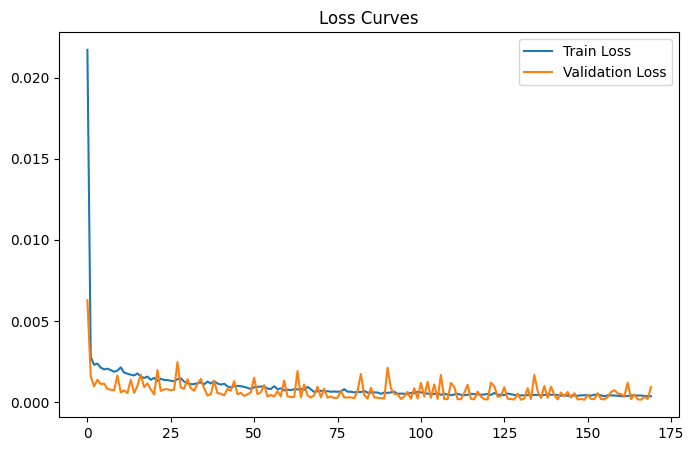

In [ ]:
# ============================================
# ✅ PLOT — Loss Curves
# ============================================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()


In [ ]:
# ============================================
# ✅ TRAIN & TEST R² (correct)
# ============================================
train_preds_scaled = model.predict(X_train_seq)
train_pred_inv = y_scaler.inverse_transform(train_preds_scaled)
train_true_inv = y_scaler.inverse_transform(y_train_seq)

test_pred_scaled = model.predict(X_test_seq)
test_pred_inv = y_scaler.inverse_transform(test_pred_scaled)
test_true_inv = y_scaler.inverse_transform(y_test_seq)

print("✅ Train R²:", r2_score(train_true_inv, train_pred_inv))
print("✅ Test  R²:",  r2_score(test_true_inv,  test_pred_inv))


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
✅ Train R²: 0.9973024631433678
✅ Test  R²: 0.8806549259200119
